<a href="https://colab.research.google.com/github/seonleeuni/mge51101-20205196/blob/master/Project/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

!pip3 install JPype1-py3

!pip3 install konlpy

!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Fetched 252 kB in 1s (172 kB/s)
Reading package lists... Done
Reading package lists... Done
Building de

In [58]:
import pandas as pd
import numpy as np

# Font environment setting for Korean font
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


path = '/content/gdrive/My Drive/Colab Notebooks/'
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data.csv')
data.head()
data.columns
data.shape[0]

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


38594

In [59]:
# Erase useles columns
data = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/sentence.xlsx')
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', '공포',5468],axis =1,inplace = True)
data.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포


In [60]:
emotion = data.Emotion.unique()

In [61]:
data.isnull().sum() #There are no null data

Sentence    0
Emotion     0
dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text

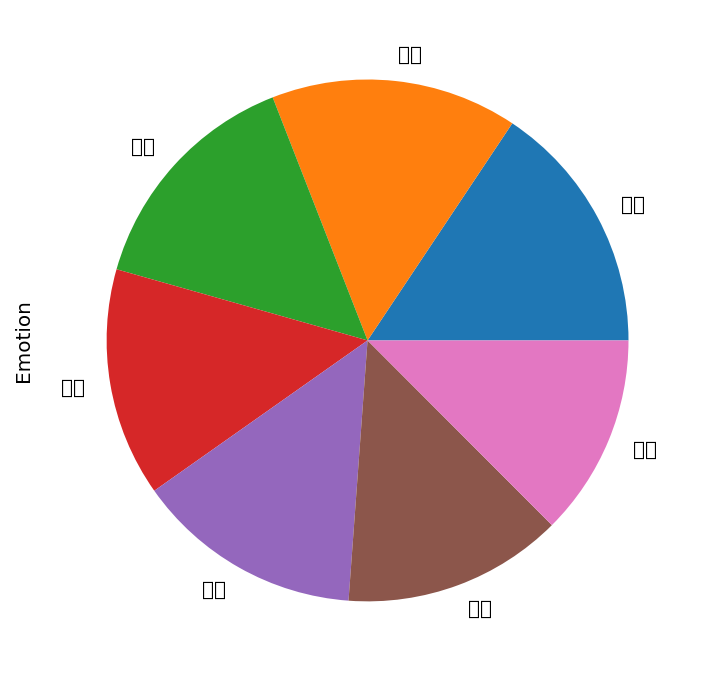

In [62]:
# Check emotion proportion
data.Emotion.value_counts().plot.pie(figsize = (6,6))

In [63]:
import re

# Remove emoticion, and typo which consists of only consonants or vowels
for i in range(0,data.shape[0]):
    text = data.Sentence[i]
    text = re.sub('[^\w\s]','',text)
    data.Sentence[i] = re.sub('([ㄱ-ㅎㅏ-ㅣ]+)','',text)

data.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요,공포
1,그냥 내 느낌일뿐겠지,공포
2,아직너무초기라서 그런거죠,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포


In [64]:
from konlpy.tag import Okt
# morphological analizer for SNS envirionment
Okt = Okt()

# normalizing and sort out just stem because lots of difference of feeling 어감차이

data['mor'] = np.nan
for i in range (0,data.shape[0]):
  data.mor[i] = Okt.morphs(data.Sentence[i], norm = True, stem = True)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Sentence,Emotion,mor
0,언니 동생으로 부르는게 맞는 일인가요,공포,"[언니, 동생, 으로, 부르다, 맞다, 일, 인가요]"
1,그냥 내 느낌일뿐겠지,공포,"[그냥, 내, 느낌, 일, 뿐, 겠다]"
2,아직너무초기라서 그런거죠,공포,"[아직, 너무, 초기, 라서, 그런, 거, 죠]"
3,유치원버스 사고 낫다던데,공포,"[유치원, 버스, 사고, 낫다]"
4,근데 원래이런거맞나요,공포,"[근데, 원래, 이렇다, 맞다]"


In [65]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#Erase stopwords
stopword = set(['은','는','이','가','것','거','의','을','를','와','야','께','바'])
data['mor_new'] = np.nan

for i in range(len(data.mor)):
  r = []
  for w in data.mor[i]: 
    if not w in stopword:
      r.append(w)
    data.mor_new[i] = r

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [66]:
#drop the Sentences which have less than 2 words

# check the length of the words for each sentence
# data.length = number of words in a sentence
data['length_n'] = np.nan
for i in range(len(data.mor_new)):
  data.length_n[i] = len(data.mor_new[i])

data.length_n = data.length_n.astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


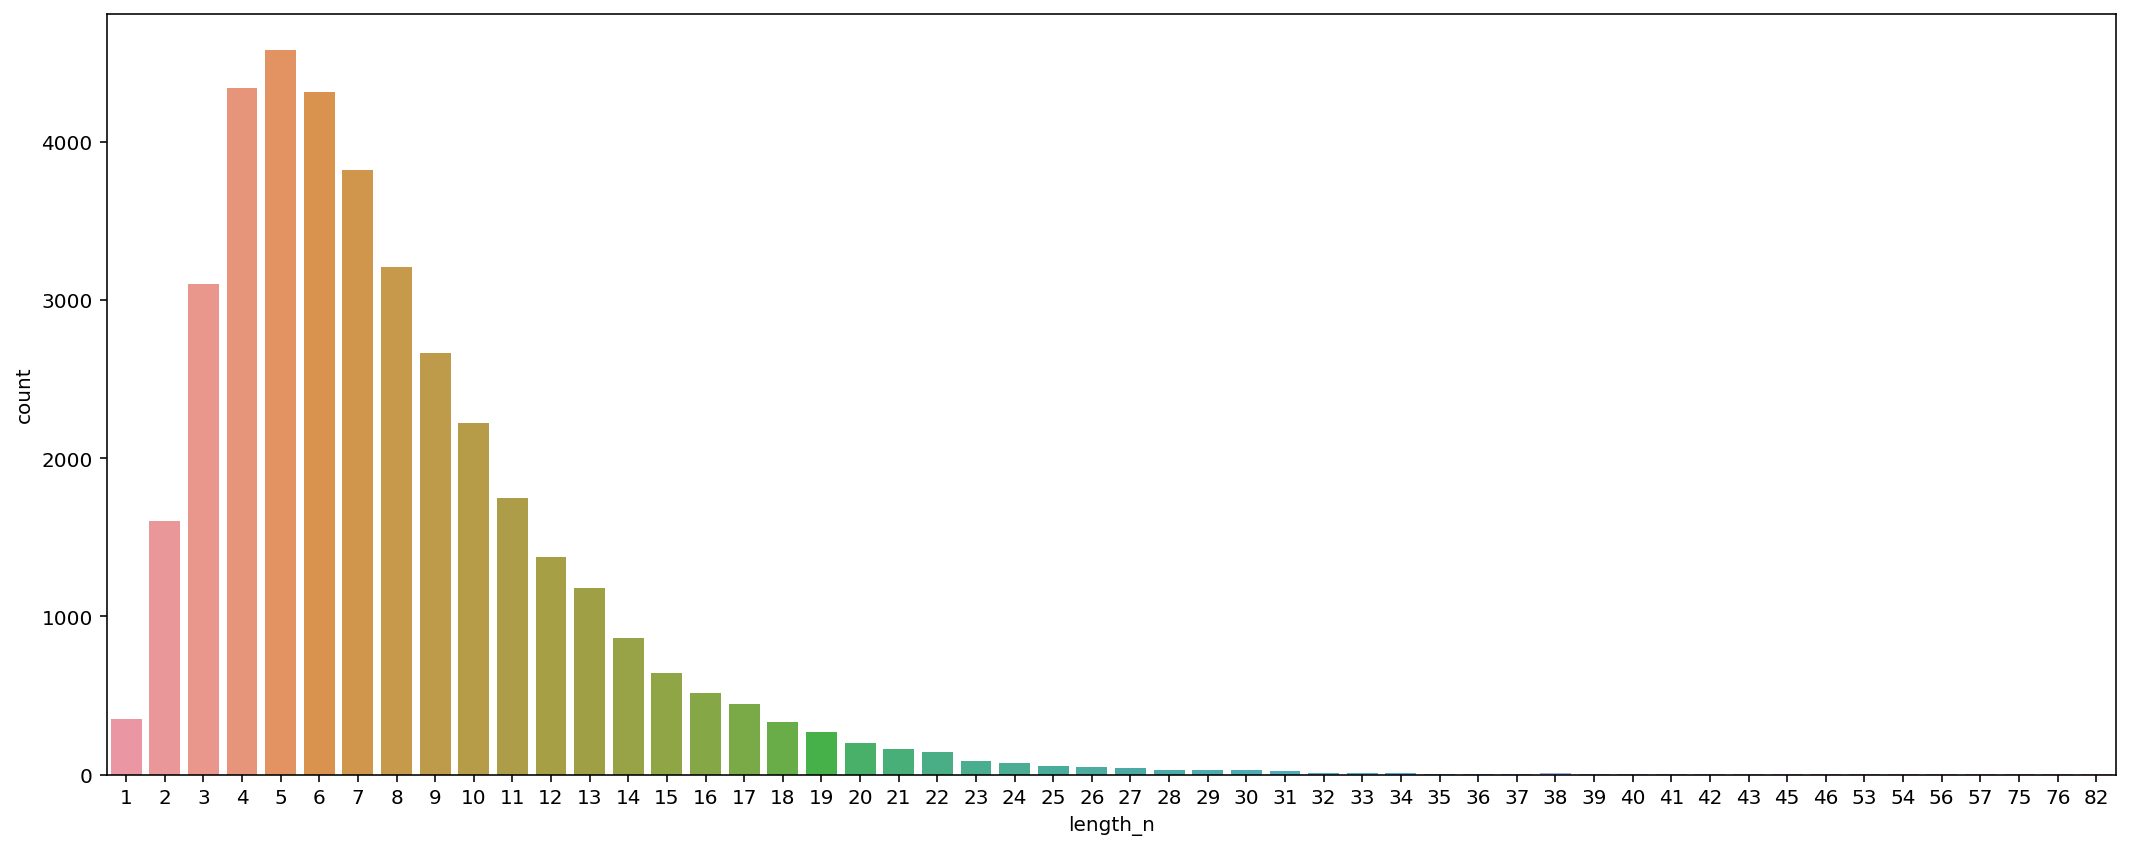

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

#Check the distribution
plt.figure(figsize = (18,7))
sns.countplot(data= data, x = 'length_n')

In [68]:
data_new = data.drop(index = data[data.length_n<3].index,axis = 0)

In [69]:
# Check how many sentences were erased
print('number of erased rows is ', data.shape[0]-data_new.shape[0])

# Check whether the distribution of emotions were changed
data_new.Emotion.value_counts()

number of erased rows is  1960


분노    5515
행복    5476
놀람    5456
혐오    5348
공포    5193
슬픔    4921
중립    4725
Name: Emotion, dtype: int64

In [70]:
# Check whether the distribution of emotions were changed
data_new.Emotion.value_counts()

분노    5515
행복    5476
놀람    5456
혐오    5348
공포    5193
슬픔    4921
중립    4725
Name: Emotion, dtype: int64

In [71]:
# array(['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오'], dtype=object)
data_new = data_new[['Sentence','Emotion']]

data_new.head()

data_new.to_csv('exc_short.csv') # Save those data for other models which are in machine learning model
!cp exc_short.csv "gdrive/My Drive/Colab Notebooks"

In [72]:
# train:valid:test = 6:2:2 (seperating dataset)
from sklearn.model_selection import train_test_split

for i in range(7):
  if i == 0:
    X = data_new[data_new.Emotion==emotion[i]]#.mor_new, data_new[data_new[Emotion[i]]==1][Emotion]
    train, test = train_test_split(X, test_size=0.2)
    train, valid = train_test_split(train, test_size = 0.25)
  else:
    X = data_new[data_new.Emotion==emotion[i]]#.mor_new, data_new[data_new[Emotion[i]]==1][Emotion]
    train_, test_ = train_test_split(X, test_size=0.2)
    train_, valid_ = train_test_split(train_, test_size = 0.25)
    train = train.append(train_)
    valid = valid.append(valid_)
    test = test.append(test_)
   


In [73]:
#Save dataset as csv file
print(train.shape[0],valid.shape[0],test.shape[0],'sum',train.shape[0]+test.shape[0] + valid.shape[0])
train.head()

train.to_csv('train.csv')
!cp train.csv "gdrive/My Drive/Colab Notebooks"

test.to_csv('test.csv')
!cp test.csv "gdrive/My Drive/Colab Notebooks"

valid.to_csv('valid.csv')
!cp valid.csv "gdrive/My Drive/Colab Notebooks"

21977 7327 7330 sum 36634


In [74]:
from torchtext.data import Field

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

tokenize = lambda x: Okt.morphs(x, norm = True, stem = True)
stopword = set(['은','는','이','가','것','거','의','을','를','와','야','께','바']) # Stop words list: Erase stopwords
TEXT = Field(sequential=True,
            use_vocab=True,
            tokenize=tokenize, # 토크나이저로는 Okt 사용
            lower=True,
            batch_first=True,
            stop_words = stopword,
            fix_length=10)

LABEL = Field(sequential=False, use_vocab=True, is_target=True,unk_token = None)

In [75]:
# change into torch data
from torchtext.data import TabularDataset

datafields = [ # we won't be needing the id, so we pass in None as the field
                 ('Unnamed: 0', None),("Sentence", TEXT),("Emotion", LABEL)
                 ]
trn, val, tst = TabularDataset.splits(
               path="/content/gdrive/My Drive/Colab Notebooks", # the root directory where the data lies
               train='train.csv', validation = "valid.csv", test="test.csv",
               format='csv',
               skip_header=True, # if your csv header has a header, make sure to pass this to ensure it doesn't get proceesed as data!
               fields=datafields)


In [76]:
print(vars(trn[1]))


{'Sentence': ['애플', '왜', 'os', '유지', '하다', '가다', '깊이', '생각', '하다', '하다'], 'Emotion': '공포'}


In [77]:
print('number of train : {}'.format(len(trn)))
print('number of test : {}'.format(len(tst)))
print('number of valid : {}'.format(len(val)))

number of train : 21977
number of test : 7330
number of valid : 7327


In [78]:
# call for pre korean embedded vector from fasttext
import torchtext
vector = torchtext.vocab.Vectors('wiki.ko.vec', cache=path)

In [79]:
import torch
MAX_VOCAB_SIZE = 25000

TEXT.build_vocab(trn, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = vector, 
                 unk_init = torch.Tensor.normal_)
LABEL.build_vocab(trn)

In [80]:
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 18192


In [81]:
print(TEXT.vocab.stoi)
print(LABEL.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7fcfa3989950>, {'<unk>': 0, '<pad>': 1, '하다': 2, '에': 3, '들': 4, '도': 5, '보다': 6, '있다': 7, '되다': 8, '다': 9, '없다': 10, '아니다': 11, '같다': 12, '이다': 13, '안': 14, '으로': 15, '진짜': 16, '한': 17, '에서': 18, '로': 19, '너무': 20, '요': 21, '못': 22, '저': 23, '만': 24, '좋다': 25, '사람': 26, '고': 27, '나': 28, '오다': 29, '가다': 30, '아': 31, '하고': 32, '그': 33, '않다': 34, '말': 35, '네': 36, '그렇다': 37, '받다': 38, '게': 39, '왜': 40, '제': 41, '들다': 42, '정말': 43, '더': 44, '어떻다': 45, '먹다': 46, '때': 47, '나오다': 48, '모르다': 49, '생각': 50, '알다': 51, '뭐': 52, '내': 53, '인데': 54, '라': 55, '좀': 56, '잘': 57, '하': 58, '많다': 59, '일': 60, '까지': 61, '나라': 62, '지금': 63, '돈': 64, '국민': 65, '적': 66, '인': 67, '개': 68, '이렇다': 69, '니': 70, '많이': 71, '그냥': 72, '지': 73, '면': 74, '자다': 75, '한테': 76, '이제': 77, '과': 78, '우리': 79, '나다': 80, '부터': 81, '님': 82, '맞다': 83, '해주다': 84, '이네': 85, '서': 86, '놈': 87, '근데': 88, '또': 89, '오늘': 90, '주다': 91, '싶다': 92, '안되다': 93, '시키다': 94, '차다': 95, '대통령': 96, '여자

In [82]:
from torchtext.data import BucketIterator
batch_size = 50

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader, valid_loader, test_loader = BucketIterator.splits(
    (trn, val, tst),
    batch_size = batch_size, 
    device = device, sort = False)

In [83]:
print('mini batch of train : {}'.format(len(train_loader)))
print('mini batch of valid : {}'.format(len(test_loader)))
print('mini batch of test : {}'.format(len(test_loader)))

mini batch of train : 440
mini batch of valid : 147
mini batch of test : 147


In [84]:
#Batch consists of Sentence & Emotion
batch = next(iter(test_loader)) # 첫번째 미니배치
print(batch.Emotion)

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4])


In [85]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim) # Embedding with fasttext word vocabulary dictionary (vocabulary size of the sentence, same with word vector dim=300)
        
        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, sentence):
        
        #batch.Sentence = [batch size, sent len]
        
        embedded = self.embedding(sentence)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]+1]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
            
        return self.fc(cat)

In [87]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
N_FILTERS = 100
FILTER_SIZES = [2,3,4] #[2-grams, 3-grams. 4-grams]
OUTPUT_DIM = len(LABEL.vocab)
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [88]:
# load pre-trained embeddings.
pretrained_embeddings = TEXT.vocab.vectors

model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1452,  0.3633, -0.3033,  ..., -0.1686,  0.0110, -0.0240],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5631,  0.3403, -0.5768,  ..., -0.4840,  0.3878, -0.4902]])

In [89]:
# make zero the initial weights of the unknown and padding tokens
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [90]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

In [91]:
def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [92]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.Sentence)
        
        loss = criterion(predictions, batch.Emotion)
        
        acc = categorical_accuracy(predictions, batch.Emotion)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [93]:
import sklearn.metrics as sk


def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    epoch_f1_score = 0
    model.eval()
    final_y_pred = []
    final_y_true = []
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.Sentence)
            
            y_pred = torch.max(predictions, 1).indices # predicted value

            y_pred = y_pred.tolist()
            y_pred
            y_true = batch.Emotion.tolist()
            y_true

            

            loss = criterion(predictions, batch.Emotion)
            
            acc = categorical_accuracy(predictions, batch.Emotion)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            epoch_f1_score += f1_score.item()
            final_y_pred = final_y_pred + y_pred
            final_y_true = final_y_true + y_true
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator), final_y_pred, final_y_true

In [94]:
# measuring time
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [95]:
N_EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    valid_loss, valid_acc, y_p, y_t = evaluate(model, valid_loader, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    # save model when the model has best validation accuracy
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut5-model.pt') #save model as 'tut5-model.pt'
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t valid. Loss: {valid_loss:.3f} |  valid. Acc: {valid_acc*100:.2f}%')
  

Epoch: 01 | Epoch Time: 0m 48s
	Train Loss: 1.646 | Train Acc: 34.47%
	 valid. Loss: 1.504 |  valid. Acc: 41.37%
Epoch: 02 | Epoch Time: 0m 44s
	Train Loss: 1.346 | Train Acc: 48.22%
	 valid. Loss: 1.503 |  valid. Acc: 41.62%
Epoch: 03 | Epoch Time: 0m 44s
	Train Loss: 1.090 | Train Acc: 58.97%
	 valid. Loss: 1.577 |  valid. Acc: 42.24%
Epoch: 04 | Epoch Time: 0m 46s
	Train Loss: 0.821 | Train Acc: 70.11%
	 valid. Loss: 1.756 |  valid. Acc: 40.80%
Epoch: 05 | Epoch Time: 0m 44s
	Train Loss: 0.594 | Train Acc: 78.93%
	 valid. Loss: 2.028 |  valid. Acc: 39.60%
Epoch: 06 | Epoch Time: 0m 44s
	Train Loss: 0.421 | Train Acc: 85.28%
	 valid. Loss: 2.333 |  valid. Acc: 39.67%
Epoch: 07 | Epoch Time: 0m 43s
	Train Loss: 0.316 | Train Acc: 88.74%
	 valid. Loss: 2.666 |  valid. Acc: 38.64%
Epoch: 08 | Epoch Time: 0m 43s
	Train Loss: 0.247 | Train Acc: 91.47%
	 valid. Loss: 2.950 |  valid. Acc: 39.22%
Epoch: 09 | Epoch Time: 0m 43s
	Train Loss: 0.197 | Train Acc: 93.16%
	 valid. Loss: 3.295 |  va

In [96]:
from sklearn.metrics import confusion_matrix

model.load_state_dict(torch.load('tut5-model.pt'))

test_loss, test_acc, pre, true = evaluate(model, test_loader, criterion)
f1_score = sk.f1_score(true,pre, average = 'micro') # calculate f1_score for all batches with average = 'micro'
            #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | F1_socre: {f1_score:.2f}')
con=confusion_matrix(true, pre) #row --> actual, column --> predicted

Test Loss: 1.487 | Test Acc: 43.69% | F1_socre: 0.44


array([[567,  18,  86, 168, 123,  90,  51],
       [ 37, 698, 110,  27,  66, 103,  55],
       [117,  64, 394,  76, 233, 130,  78],
       [372,  33,  99, 246, 142,  99,  79],
       [ 45,  20,  89,  32, 602, 210,  41],
       [ 43,  36,  55,  26, 271, 531,  23],
       [145,  84, 152,  91, 195, 110, 168]])

In [147]:
con=confusion_matrix(true, pre)

recall_sentiment = []
precision_sentiment = []
number = []
for i in range(7):
  recall_sentiment.append(con[i,i]/sum(con[i,:]))
  precision_sentiment.append(con[i,i]/sum(con[:,i]))
  number.append(sum(con[i,:])/sum(sum(con)))
sentiment = pd.DataFrame([recall_sentiment,precision_sentiment,number])

sentiment.columns = label
sentiment.index = ['Recall','Precision','number']

sentiment.round(2)


,angry,happy,surprised,disgusted,scared,sad,neutral
Recall,0.51,0.64,0.36,0.23,0.58,0.54,0.18
Precision,0.43,0.73,0.40,0.37,0.37,0.42,0.34
number,0.15,0.15,0.15,0.15,0.14,0.13,0.13


In [146]:
sum(con)


array([1326,  953,  985,  666, 1632, 1273,  495])

In [111]:
emotion


array(['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오'], dtype=object)